Must needed setup before every assignment

In [1]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

'apt' is not recognized as an internal or external command,
operable program or batch file.


Imports

In [1]:
from math import e, log, ceil
import numpy as np
from numba import jit
from time import time
from math import inf
import shelve
import matplotlib.pyplot as pl

Jit

In [2]:
@jit
# http://numba.pydata.org/numba-doc/0.17.0/user/jit.html
def hash_fcn(a, b, x): # p, n_buckets
    return ((a * (x % p) + b) % p) % numBuckets

Variables

In [3]:
delta = e ** (-5)
eps = e * 1e-4
p = 123457
aa = []
bb = []
numHashes = ceil(log(1 / delta))
numBuckets = ceil(e / eps)
#fileSuffix = '_tiny'
fileSuffix = ''

Open files

In [4]:
with open('hash_params.txt') as f:
    for line in f:
        a, b = line.split()
        aa.append(int(a))
        bb.append(int(b))
assert len(aa) == numHashes

c = np.zeros((numHashes, numBuckets), dtype=int)

t0 = time()
with open('words_stream' + fileSuffix + '.txt') as f:
    for i, wordID in enumerate(f):
        if i % 100000 == 0:
            print(i)
        wordID = int(wordID)
        for j in range(numHashes):
            c[j, hash_fcn(aa[j], bb[j], wordID)] += 1
t = i + 1
print(time() - t0)

realCounts = {}
with open('counts' + fileSuffix + '.txt') as f:
    for line in f:
        wordID, cnt = line.split()
        realCounts[int(wordID)] = int(cnt)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
10000000
10100000
10200000
10300000
10400000
10500000
10600000
10700000
10800000
10900000
11000000
11100000
11200000
11300000
11400000
11500000
11600000
11700000
11800000
11900000
12000000
12100000
12200000
12300000

92400000
92500000
92600000
92700000
92800000
92900000
93000000
93100000
93200000
93300000
93400000
93500000
93600000
93700000
93800000
93900000
94000000
94100000
94200000
94300000
94400000
94500000
94600000
94700000
94800000
94900000
95000000
95100000
95200000
95300000
95400000
95500000
95600000
95700000
95800000
95900000
96000000
96100000
96200000
96300000
96400000
96500000
96600000
96700000
96800000
96900000
97000000
97100000
97200000
97300000
97400000
97500000
97600000
97700000
97800000
97900000
98000000
98100000
98200000
98300000
98400000
98500000
98600000
98700000
98800000
98900000
99000000
99100000
99200000
99300000
99400000
99500000
99600000
99700000
99800000
99900000
100000000
100100000
100200000
100300000
100400000
100500000
100600000
100700000
100800000
100900000
101000000
101100000
101200000
101300000
101400000
101500000
101600000
101700000
101800000
101900000
102000000
102100000
102200000
102300000
102400000
102500000
102600000
102700000
102800000
102900000
103000000
103100

175100000
175200000
175300000
175400000
175500000
175600000
175700000
175800000
175900000
176000000
176100000
176200000
176300000
176400000
176500000
176600000
176700000
176800000
176900000
177000000
177100000
177200000
177300000
177400000
177500000
177600000
177700000
177800000
177900000
178000000
178100000
178200000
178300000
178400000
178500000
178600000
178700000
178800000
178900000
179000000
179100000
179200000
179300000
179400000
179500000
179600000
179700000
179800000
179900000
180000000
180100000
180200000
180300000
180400000
180500000
180600000
180700000
180800000
180900000
181000000
181100000
181200000
181300000
181400000
181500000
181600000
181700000
181800000
181900000
182000000
182100000
182200000
182300000
182400000
182500000
182600000
182700000
182800000
182900000
183000000
183100000
183200000
183300000
183400000
183500000
183600000
183700000
183800000
183900000
184000000
184100000
184200000
184300000
184400000
184500000
184600000
184700000
184800000
184900000
185000000


Code

ERROR shelving: __builtin__
ERROR shelving: __builtins__
ERROR shelving: exit
ERROR shelving: f
ERROR shelving: get_ipython
ERROR shelving: np
ERROR shelving: pl
ERROR shelving: quit
ERROR shelving: shelve


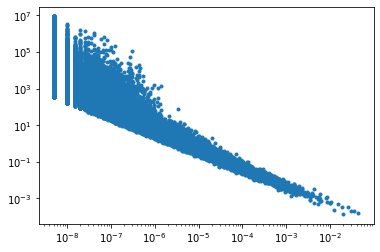

In [5]:
hashCounts = {}
for wordID in realCounts:
    hashCount = inf
    for j in range(numHashes):
        cjh = c[j, hash_fcn(aa[j], bb[j], wordID)]
        hashCount = min(hashCount, cjh)
    hashCounts[wordID] = hashCount

error = []
exact = []
for wordID, realCount in realCounts.items():
    error.append((hashCounts[wordID] - realCount) / realCount)
    exact.append(realCount / t)
pl.loglog(exact, error, '.')


my_shelf = shelve.open('allVar' + fileSuffix, 'n') # 'n' for new
for key in dir():
    try:
        my_shelf[key] = globals()[key]
    except: # TypeError:
        # __builtins__, my_shelf, and imported modules can not be shelved.
        print('ERROR shelving: {0}'.format(key))
my_shelf.close()

Plotting

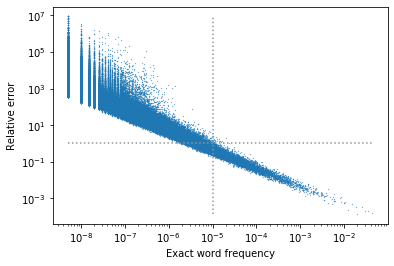

In [8]:
fileSuffix = ''

my_shelf = shelve.open('allVar' + fileSuffix)
error = my_shelf['error']
exact = my_shelf['exact']
my_shelf.close()
m_error = min(error)
M_error = max(error)
m_exact = min(exact)
M_exact = max(exact)

pl.loglog(exact, error, '.', markersize=.5)
pl.loglog([m_exact, M_exact], [1, 1], ':', color='xkcd:gray')
pl.loglog([1e-5, 1e-5], [m_error, M_error], ':', color='xkcd:gray')
pl.xlabel('Exact word frequency')
pl.ylabel('Relative error')
pl.savefig('plot.png', dpi=300, bbox_inches='tight')
pl.show()